<a href="https://colab.research.google.com/github/lephuocdat2000/DeepLearning-and-Application/blob/main/MyCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Flatten
from keras import Model

class CNN:
  def __init__(self):
    self.model = None

  # Build architecture of the network
  def build(self, input_dim):
    input = Input(shape=input_dim)
    # Convolution block
    C1 = Conv2D(3, (3, 3), padding="same", activation='relu', use_bias=True)(input)
    # Fully Connected block
    flat = Flatten()(C1)
    FC1 = Dense(120, activation='relu', use_bias=True)(flat)
    FC2 = Dense(84, activation='relu', use_bias=True)(FC1)
    output = Dense(10, activation='softmax', use_bias=True)(FC2)
    self.model = Model(input, output)
    self.model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
  
  # Train the given architecture with data
  def train(self, x_train, y_train):
    history = self.model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)
    return history

  def predict(self, x_test):
    return self.model.predict(x_test)

  def summary(self):
    self.model.summary()

  def load(self, model_file):
    self.model = load_model(model_file)

  def save(self, model_file):
    self.model.save(model_file)

In [11]:
# Prepare data
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train_norm = x_train / 255.0 # Attention here: use 255.0 instead of 255
x_test_norm = x_test / 255.0 

# Convert to one-hot vector
def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  oh[np.arange(y.shape[0]), y] = 1
  return oh

y_train_oh = onehot(y_train)
y_test_oh = onehot(y_test)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Size of input:  (60000, 28, 28)


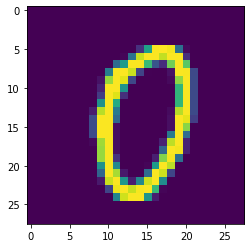

In [12]:
import matplotlib.pyplot as plt
index = 1000
print(y_train_oh[index])
plt.imshow(x_train_norm[index])
print('Size of input: ', x_train_norm.shape)

In [28]:
CNN = CNN()
CNN.build((28, 28, 1))
CNN.summary()
hist = CNN.train(x_train_norm, y_train_oh)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 3)         30        
_________________________________________________________________
flatten_7 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               282360    
_________________________________________________________________
dense_15 (Dense)             (None, 84)                10164     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                850       
Total params: 293,404
Trainable params: 293,404
Non-trainable params: 0
_______________________________________________________

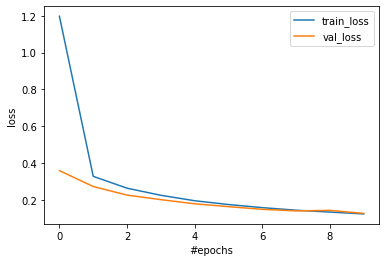

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.show()

Predicted label:  0


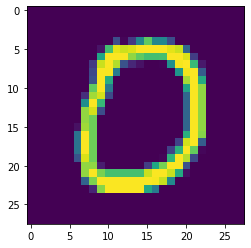

In [32]:
pred = CNN.predict(x_test_norm)
index = 10
print('Predicted label: ', np.argmax(pred[index]))
plt.imshow(x_test_norm[index])